# setup

In [1]:
import itertools
import json
import string
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## dataset

In [5]:
folders = [
    "snapshot_20231012",
]
files = [
    "20231012_232232_hn_sharings.json",
]

paths = []
for folderpath in folders:
    for filepath in files:
        paths.append("./" + folderpath + "/" + filepath)
print(paths)

data = []
snapshot_counts = {}

# Load the JSON data from each path and add the snapshot name to each commit
for path in paths:
    with open(path) as f:
        d = json.load(f)
        snapshot_name = path.split("/")[-1]  # Extract snapshot name from path
        discussions = d["Sources"]
        snapshot_counts[snapshot_name] = {"original": len(discussions), "filtered": 0}
        for discussion in discussions:
            discussion["Snapshot"] = (
                snapshot_name  # So that we can create a csv with column showing which snapshot the discussion came from
            )
            data.append(discussion)

print("Total original size: ", len(data), " discussions")

['./snapshot_20231012/20231012_232232_hn_sharings.json']
Total original size:  187  discussions


## nltk

In [8]:
# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Load stopwords
stop_words = set(stopwords.words("english"))
# Add common punctuation to stopwords
stop_words.update(string.punctuation)

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# setup

# counting word frequencies

In [3]:
# Initialize the word frequency dictionary and co-occurrence matrix
word_freq = Counter()
co_occurrence = defaultdict(Counter)


# Function to count words and update co-occurrence matrix in a text
def process_text(text):
    if text:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [
            word for word in tokens if word.isalpha() and word not in stop_words
        ]
        word_freq.update(filtered_tokens)
        for pair in itertools.combinations(filtered_tokens, 2):
            co_occurrence[pair[0]][pair[1]] += 1
            co_occurrence[pair[1]][pair[0]] += 1
        return filtered_tokens


# Process each discussion
for discussion in data:
    title = discussion.get("Title", "")
    story_text = discussion.get("StoryText", "")
    process_text(title)
    process_text(story_text)

print("Word frequency and co-occurrence matrix calculated.")

Word frequency and co-occurrence matrix calculated.


# showing word frequencies

In [4]:
# Step 1: Extract the most common words
most_common_words = [word for word, _ in word_freq.most_common(20)]

# Display the most common words
print("Most common words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Most common words:
chatgpt: 66
hn: 42
p: 36
show: 22
https: 20
ask: 19
ai: 19
gpt: 17
get: 10
google: 9
midjourney: 9
using: 7
good: 7
example: 7
like: 7
code: 7
first: 7
time: 7
prompt: 7
use: 6


# showing cooccurence matrix

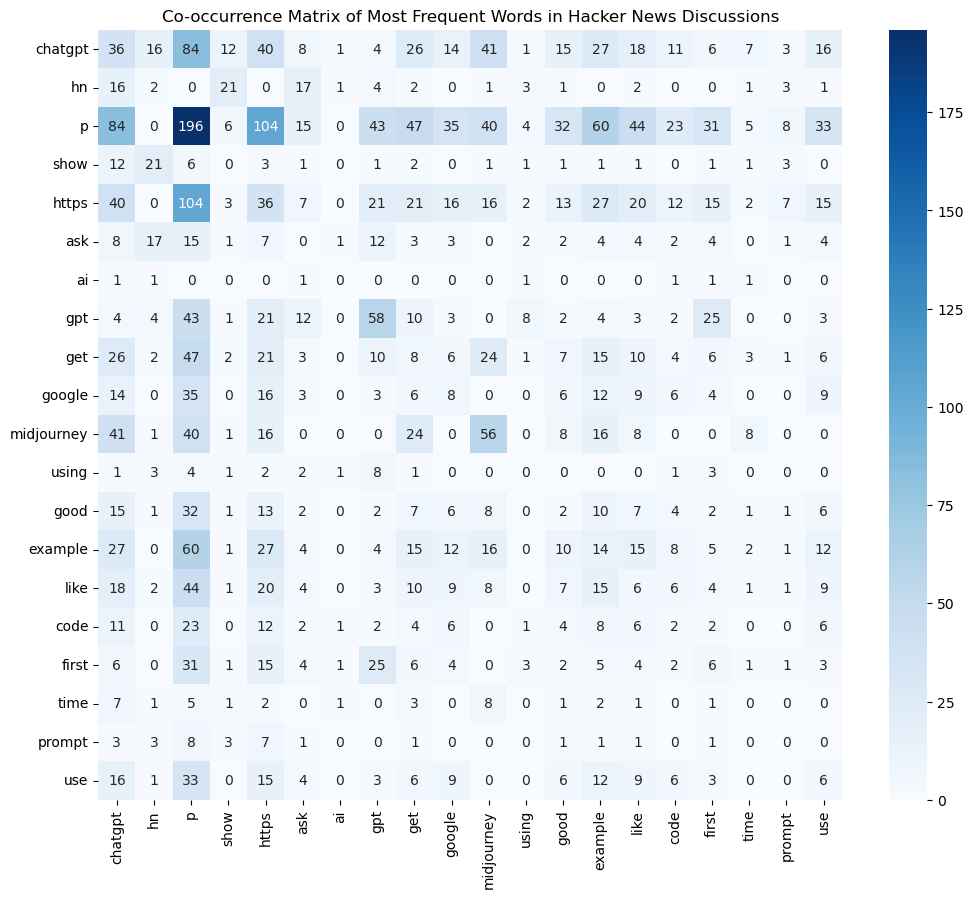

In [5]:
# Step 2: Create a co-occurrence matrix for the most common words
matrix = np.zeros((len(most_common_words), len(most_common_words)))
word_index = {word: i for i, word in enumerate(most_common_words)}

for word1, word2_counts in co_occurrence.items():
    if word1 in word_index:
        for word2, count in word2_counts.items():
            if word2 in word_index:
                i, j = word_index[word1], word_index[word2]
                matrix[i, j] = count

# Step 3: Visualize the co-occurrence matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    matrix,
    xticklabels=most_common_words,
    yticklabels=most_common_words,
    cmap="Blues",
    annot=True,
    fmt=".0f",
)
plt.title("Co-occurrence Matrix of Most Frequent Words in Hacker News Discussions")
plt.show()

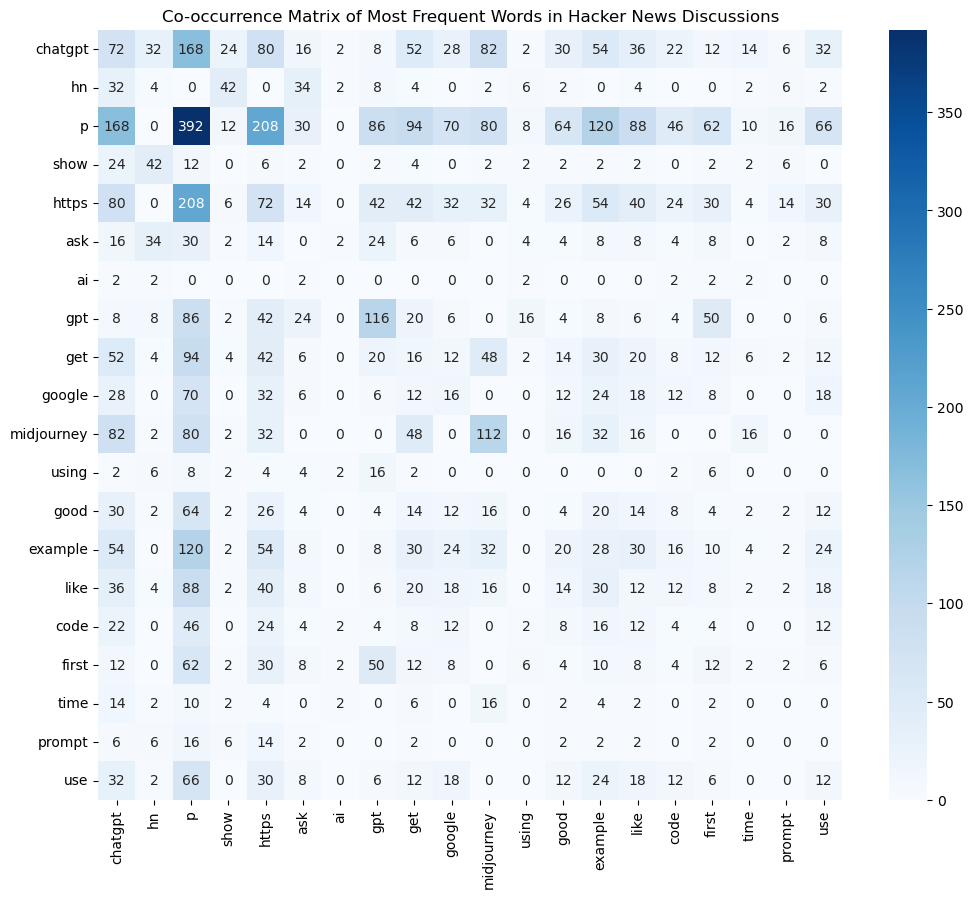

In [13]:
# Initialize the word frequency dictionary and co-occurrence matrix
word_freq = Counter()
co_occurrence = defaultdict(Counter)

# Function to count words and update co-occurrence matrix in a text
def process_text(text):
    if text:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [
            word for word in tokens if word.isalpha() and word not in stop_words
        ]
        word_freq.update(filtered_tokens)
        for pair in itertools.combinations(filtered_tokens, 2):
            co_occurrence[pair[0]][pair[1]] += 1
            co_occurrence[pair[1]][pair[0]] += 1


# Process words in each discussion
for commit in data:
    title = commit.get("Title", "")
    story_text = commit.get("StoryText", "")
    process_text(title)
    process_text(story_text)

# Step 2: Extract the most common words
most_common_words = [word for word, _ in word_freq.most_common(20)]

# Step 3: Create a co-occurrence matrix for the most common words
matrix = np.zeros((len(most_common_words), len(most_common_words)))
word_index = {word: i for i, word in enumerate(most_common_words)}

for word1, word2_counts in co_occurrence.items():
    if word1 in word_index:
        for word2, count in word2_counts.items():
            if word2 in word_index:
                i, j = word_index[word1], word_index[word2]
                matrix[i, j] = count

# Step 4: Visualize the co-occurrence matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    matrix,
    xticklabels=most_common_words,
    yticklabels=most_common_words,
    cmap="Blues",
    annot=True,
    fmt=".0f",
)
plt.title("Co-occurrence Matrix of Most Frequent Words in Hacker News Discussions")
plt.show()